<a href="https://colab.research.google.com/github/Ahmed-Sobeih/Manually/blob/main/Manually_all_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Start with linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
incomes = [1000, 1100, 1075, 950, 920, 1040, 1070, 1075, 1100, 1100, 1050, 950, 1000, 970, 920, 900, 980, 1050, 1080, 1060, 1100, 1050, 950, 1000, 970, 920, 950, 920, 1040, 1070]
consumption = [200, 250, 230, 170, 130, 220, 260, 270, 250, 250, 220, 180, 200, 160, 150, 150, 190, 200, 220, 240, 260, 270, 250, 200, 160, 150, 150, 230, 170, 130]

In [ ]:
len(consumption)

30

In [ ]:
# Create a dictionary with lists as values
data_dict = {"income": incomes, "consumption": consumption}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Print the resulting dataset (DataFrame)
print(df)

    income  consumption
0     1000          200
1     1100          250
2     1075          230
3      950          170
4      920          130
5     1040          220
6     1070          260
7     1075          270
8     1100          250
9     1100          250
10    1050          220
11     950          180
12    1000          200
13     970          160
14     920          150
15     900          150
16     980          190
17    1050          200
18    1080          220
19    1060          240
20    1100          260
21    1050          270
22     950          250
23    1000          200
24     970          160
25     920          150
26     950          150
27     920          230
28    1040          170
29    1070          130


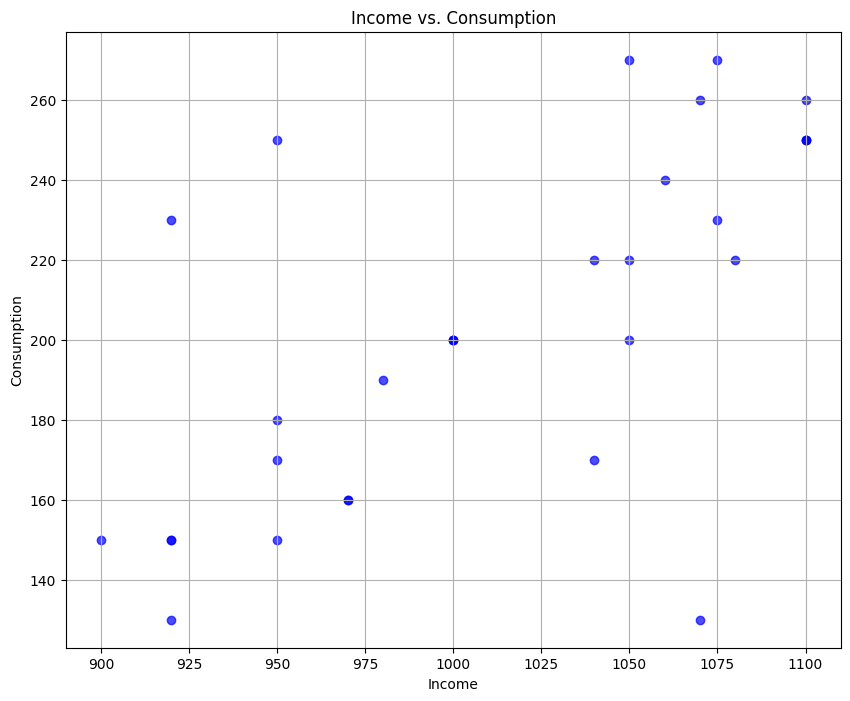

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
plt.scatter(df["income"], df["consumption"], color='blue', alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Consumption")
plt.title("Income vs. Consumption")
plt.grid(True)  # Add grid lines for better readability
plt.show()

# 4 repeatitive pairs will be reperesented as 4 data points
#[1100, 250] repeated 3 times
#[1000, 200] repeated 3 times
#[970, 160] repeated twice
#[920, 150] repeated twice
#this is why we have 24 data points in the scatterplot instead of 30 data points
#which raises a question, is the effect of repetitive values ignored in linear regression algorithm?

In [ ]:
#plt.figure()  # Create a new figure window
# Assuming you have external libraries for drawing (check specific language/environment)
income_list = df["income"].tolist()
consumption_list = df["consumption"].tolist()
unique_dp = {}
pair = []
for i in range(len(income_list)):
    income = income_list[i]
    #print(income)
    consumption = consumption_list[i]
    #print(consumption)
    pair.append(income_list[i])
    pair.append(consumption_list[i])
    unique_dp[income_list[i]] = consumption_list[i]
    # Use drawing functions to plot a circle or marker at (income, consumption) coordinates
print(unique_dp)
#plt.plot(income, consumption, marker='o', color='blue', markersize=5)  # Plot a blue circle with size 5
#plt.xlabel("Income")
#plt.ylabel("Consumption")
#plt.title("Income vs. Consumption (Manual Plot)")

{1000: 200, 1100: 260, 1075: 270, 950: 150, 920: 230, 1040: 170, 1070: 130, 1050: 270, 970: 160, 900: 150, 980: 190, 1080: 220, 1060: 240}


In [ ]:
print(income)

1070


<Axes: >

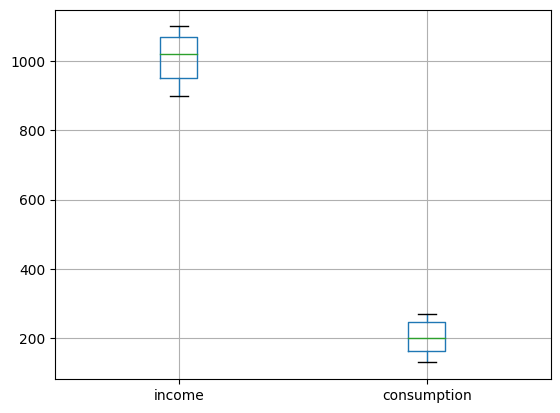

In [ ]:
df.boxplot()

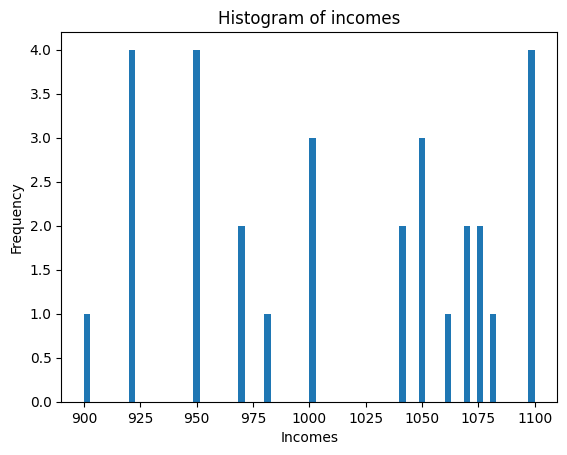

In [ ]:
plt.hist(df["income"], bins = 70)
plt.xlabel("Incomes")
plt.ylabel("Frequency")
plt.title(f"Histogram of incomes")
plt.show()

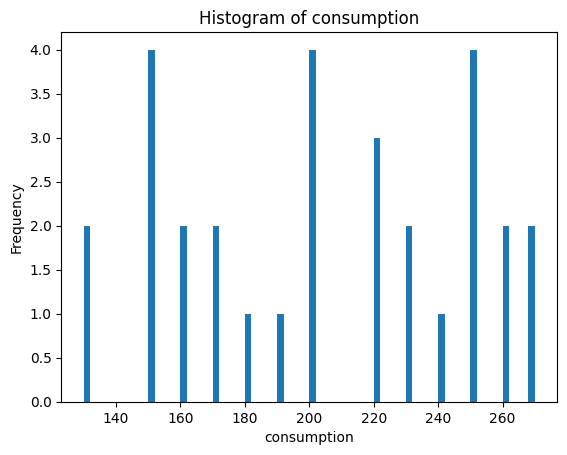

In [ ]:
plt.hist(df["consumption"], bins = 70)
plt.xlabel("consumption")
plt.ylabel("Frequency")
plt.title(f"Histogram of consumption")
plt.show()

In [ ]:
df['income'].value_counts()
df['consumption'].value_counts()

consumption
200    4
250    4
150    4
220    3
230    2
170    2
130    2
260    2
270    2
160    2
180    1
190    1
240    1
Name: count, dtype: int64

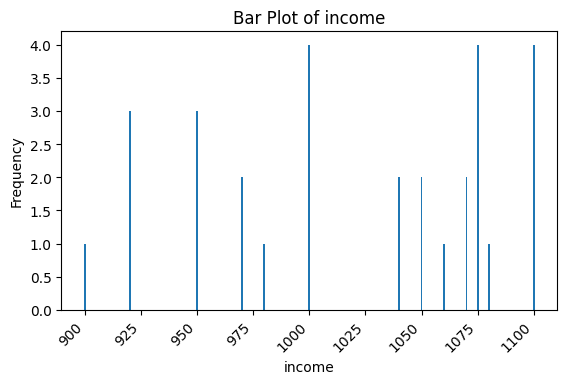

In [ ]:
#creating histogram manually

# Specify the column name for the histogram
column_name = "income"

# Extract the unique values for custom categories
unique_values = df['income'].unique()

# Extract the counts for each unique value
counts = df['income'].value_counts()

# Create the bar plot with custom categories
plt.bar(unique_values, counts)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title(f"Bar Plot of {column_name}")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Consider adding space between bars if there are many categories
plt.subplots_adjust(bottom=0.3)  # Adjust space for x-axis labels

plt.show()

**START MODELING BY HAND**

FIRST ASSUMPTION

In [ ]:
#linear regression problem
#1- learn (from data we have), 2- formulate(form a plan or function), 3- predict (apply the plan on the future)
#formula:
#f(x) = wx + b
#w is slobe
#b is the intercept
# consumption = w(income) + b
#cost function:
#j(w)= (y1-y1')^2 + (y2-y2')^2 + (y3 - y3')^2.... (yn-yn')^2 / n
#or absolutes instead of squares, i'll do absolutes this time

#the graph of j(w)and w


#assuming the function, #1:
#consumption = .1(income) + 0
#w = 0.1, b = 0
w1 = 0.1
consumption_pred1 = []
for income in incomes:
  consumption_pred1.append(income * w1 + 0)

print(consumption_pred1)

[100.0, 110.0, 107.5, 95.0, 92.0, 104.0, 107.0, 107.5, 110.0, 110.0, 105.0, 95.0, 100.0, 97.0, 92.0, 90.0, 98.0, 105.0, 108.0, 106.0, 110.0, 105.0, 95.0, 100.0, 97.0, 92.0, 95.0, 92.0, 104.0, 107.0]


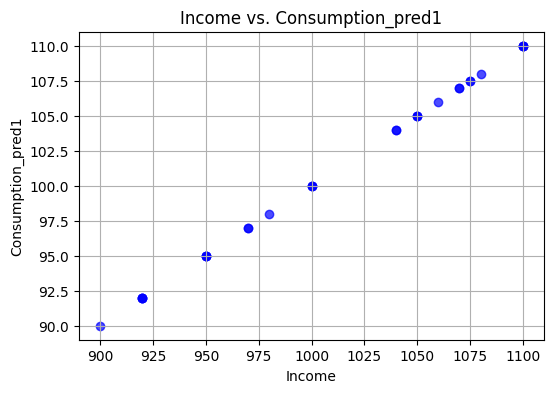

In [ ]:
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(df["income"], consumption_pred1, color='blue', alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Consumption_pred1")
plt.title("Income vs. Consumption_pred1")
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [ ]:
#re-running the code to avoid error
incomes = [1000, 1100, 1075, 950, 920, 1040, 1070, 1075, 1100, 1100, 1050, 950, 1000, 970, 920, 900, 980, 1050, 1080, 1060, 1100, 1050, 950, 1000, 970, 920, 950, 920, 1040, 1070]
consumption = [200, 250, 230, 170, 130, 220, 260, 270, 250, 250, 220, 180, 200, 160, 150, 150, 190, 200, 220, 240, 260, 270, 250, 200, 160, 150, 150, 230, 170, 130]

In [ ]:

#counting the cost function for consumption_pred1
#cost function equation: jw = 1/m sum(y - y')
jw1 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred1[i])
  jw1 += x

jw1 = jw1/30

print(jw1)
#if it gives error, run the consumption declaring cell again

102.46666666666667


In [ ]:
handy = abs(consumption[0] - consumption_pred1[0])
handy += abs(consumption[1] - consumption_pred1[1])
handy += abs(consumption[2] - consumption_pred1[2])
handy += abs(consumption[3] - consumption_pred1[3])
handy += abs(consumption[4] - consumption_pred1[4])
handy += abs(consumption[5] - consumption_pred1[5])
handy += abs(consumption[6] - consumption_pred1[6])
handy += abs(consumption[7] - consumption_pred1[7])
handy += abs(consumption[8] - consumption_pred1[8])
handy += abs(consumption[9] - consumption_pred1[9])
handy += abs(consumption[10] - consumption_pred1[10])
handy += abs(consumption[11] - consumption_pred1[11])
handy += abs(consumption[12] - consumption_pred1[12])
handy += abs(consumption[13] - consumption_pred1[13])
handy += abs(consumption[14] - consumption_pred1[14])
handy += abs(consumption[15] - consumption_pred1[15])
handy += abs(consumption[16] - consumption_pred1[16])
handy += abs(consumption[17] - consumption_pred1[17])
handy += abs(consumption[18] - consumption_pred1[18])
handy += abs(consumption[19] - consumption_pred1[19])
handy += abs(consumption[20] - consumption_pred1[20])
handy += abs(consumption[21] - consumption_pred1[21])
handy += abs(consumption[22] - consumption_pred1[22])
handy += abs(consumption[23] - consumption_pred1[23])
handy += abs(consumption[24] - consumption_pred1[24])
handy += abs(consumption[25] - consumption_pred1[25])
handy += abs(consumption[26] - consumption_pred1[26])
handy += abs(consumption[27] - consumption_pred1[27])
handy += abs(consumption[28] - consumption_pred1[28])
handy += abs(consumption[29] - consumption_pred1[29])

print(handy)

3074.0


Graphing cost function and the slope

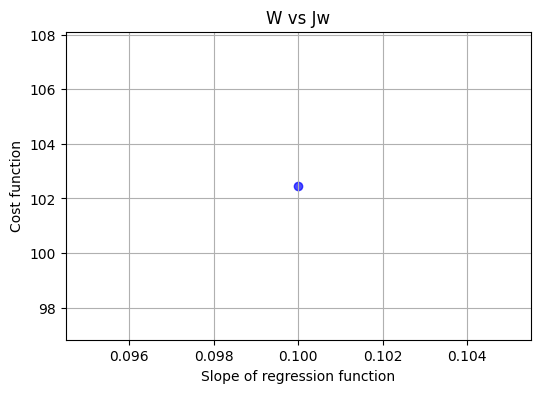

In [ ]:
list_of_ws = [w1]
list_of_jws = [jw1]
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

SECOND ASSUMPTION

In [ ]:
w2 = 0.2
consumption_pred2 = []
for income in incomes:
  consumption_pred2.append(income * w2 + 0)

print(consumption_pred2)

[200.0, 220.0, 215.0, 190.0, 184.0, 208.0, 214.0, 215.0, 220.0, 220.0, 210.0, 190.0, 200.0, 194.0, 184.0, 180.0, 196.0, 210.0, 216.0, 212.0, 220.0, 210.0, 190.0, 200.0, 194.0, 184.0, 190.0, 184.0, 208.0, 214.0]


In [ ]:
#counting the cost function for consumption_pred2
jw2 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred2[i])
  jw2 += x
jw2 = jw2/30

print(jw2)

29.8


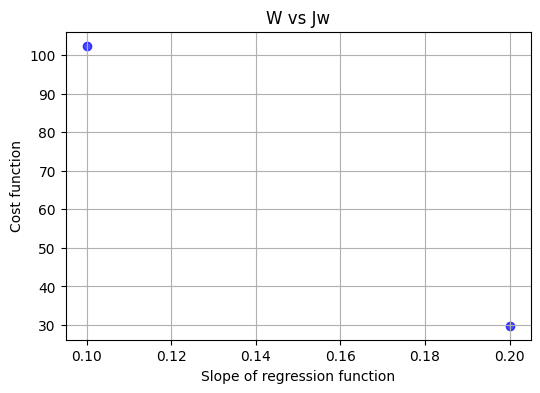

In [ ]:
list_of_ws.append(w2)
list_of_jws.append(jw2)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

THIRD ASSUMPTION

In [ ]:
w3 = 0.3
consumption_pred3 = []
for income in incomes:
  consumption_pred3.append(income * w3 + 0)

print(consumption_pred3)

[300.0, 330.0, 322.5, 285.0, 276.0, 312.0, 321.0, 322.5, 330.0, 330.0, 315.0, 285.0, 300.0, 291.0, 276.0, 270.0, 294.0, 315.0, 324.0, 318.0, 330.0, 315.0, 285.0, 300.0, 291.0, 276.0, 285.0, 276.0, 312.0, 321.0]


In [ ]:
#counting the cost function for consumption_pred3
jw3 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred3[i])
  jw3 += x
jw3 = jw3/30

print(jw3)

99.93333333333334


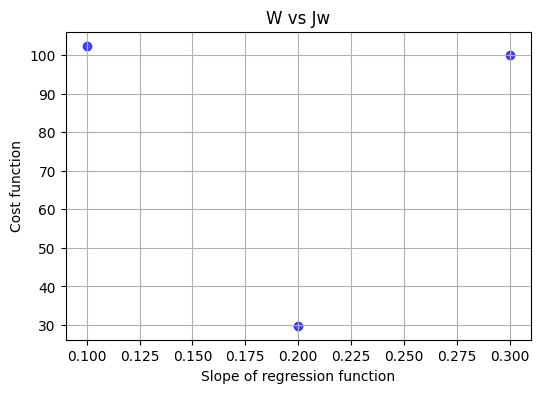

In [ ]:
list_of_ws.append(w3)
list_of_jws.append(jw3)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

NOW WE HAVE THE MAIN SHAPE OF THE PARABOLA,
NEXT STEPS ARE FOR REFINING

ASSUMPTION 4

In [ ]:
w4 = 0.15
consumption_pred4 = []
for income in incomes:
  consumption_pred4.append(income * w4 + 0)

print(consumption_pred4)

[150.0, 165.0, 161.25, 142.5, 138.0, 156.0, 160.5, 161.25, 165.0, 165.0, 157.5, 142.5, 150.0, 145.5, 138.0, 135.0, 147.0, 157.5, 162.0, 159.0, 165.0, 157.5, 142.5, 150.0, 145.5, 138.0, 142.5, 138.0, 156.0, 160.5]


In [ ]:
#counting the cost function for consumption_pred4
jw4 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred4[i])
  jw4 += x
jw4 = jw4/30

print(jw4)

54.43333333333333


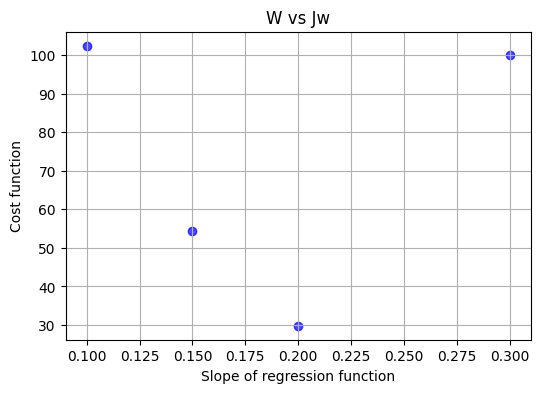

In [ ]:
list_of_ws.append(w4)
list_of_jws.append(jw4)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

Assumption 5

In [ ]:
w5 = 0.25
consumption_pred5 = []
for income in incomes:
  consumption_pred5.append(income * w5 + 0)

print(consumption_pred5)

[250.0, 275.0, 268.75, 237.5, 230.0, 260.0, 267.5, 268.75, 275.0, 275.0, 262.5, 237.5, 250.0, 242.5, 230.0, 225.0, 245.0, 262.5, 270.0, 265.0, 275.0, 262.5, 237.5, 250.0, 242.5, 230.0, 237.5, 230.0, 260.0, 267.5]


In [ ]:
#counting the cost function for consumption_pred5
jw5 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred5[i])
  jw5 += x
jw5 = jw5/30

print(jw5)

50.75


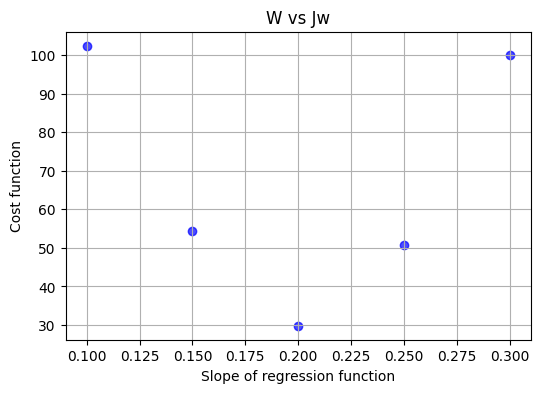

In [ ]:
list_of_ws.append(w5)
list_of_jws.append(jw5)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

ASSUMPTION 6

In [ ]:
w6 = 0.18
consumption_pred6 = []
for income in incomes:
  consumption_pred6.append(income * w6 + 0)

print(consumption_pred6)

[180.0, 198.0, 193.5, 171.0, 165.6, 187.2, 192.6, 193.5, 198.0, 198.0, 189.0, 171.0, 180.0, 174.6, 165.6, 162.0, 176.4, 189.0, 194.4, 190.79999999999998, 198.0, 189.0, 171.0, 180.0, 174.6, 165.6, 171.0, 165.6, 187.2, 192.6]


In [ ]:
#counting the cost function for consumption_pred6
jw6 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred6[i])
  jw6 += x
jw6 = jw6/30

print(jw6)

35.49333333333333


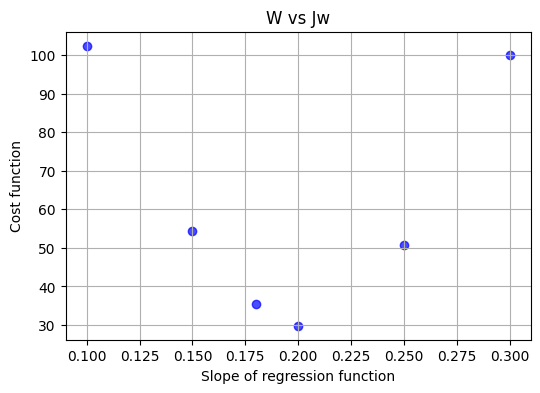

In [ ]:
list_of_ws.append(w6)
list_of_jws.append(jw6)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

ASSUMPTION 7

In [ ]:
w7 = 0.22
consumption_pred7 = []
for income in incomes:
  consumption_pred7.append(income * w7 + 0)

print(consumption_pred7)

[220.0, 242.0, 236.5, 209.0, 202.4, 228.8, 235.4, 236.5, 242.0, 242.0, 231.0, 209.0, 220.0, 213.4, 202.4, 198.0, 215.6, 231.0, 237.6, 233.2, 242.0, 231.0, 209.0, 220.0, 213.4, 202.4, 209.0, 202.4, 228.8, 235.4]


In [ ]:
#counting the cost function for consumption_pred7
jw7 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred7[i])
  jw7 += x
jw7 = jw7/30

print(jw7)

33.27333333333334


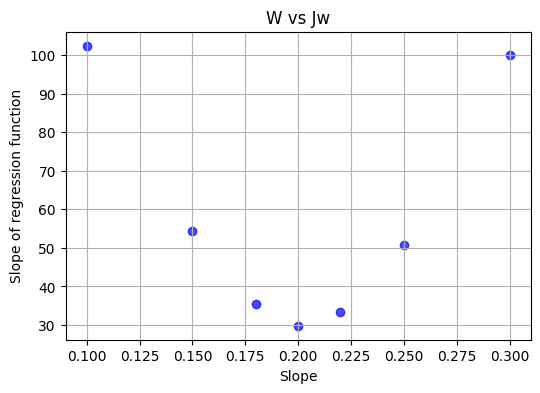

In [ ]:
list_of_ws.append(w7)
list_of_jws.append(jw7)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope")
plt.ylabel("Slope of regression function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

Assumption 8


In [ ]:
w8 = 0.19
consumption_pred8 = []
for income in incomes:
  consumption_pred8.append(income * w8 + 0)

print(consumption_pred8)

[190.0, 209.0, 204.25, 180.5, 174.8, 197.6, 203.3, 204.25, 209.0, 209.0, 199.5, 180.5, 190.0, 184.3, 174.8, 171.0, 186.2, 199.5, 205.2, 201.4, 209.0, 199.5, 180.5, 190.0, 184.3, 174.8, 180.5, 174.8, 197.6, 203.3]


In [ ]:
#counting the cost function for consumption_pred8
jw8 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred8[i])
  jw8 += x
jw8 = jw8 / 30

print(jw8)

31.813333333333336


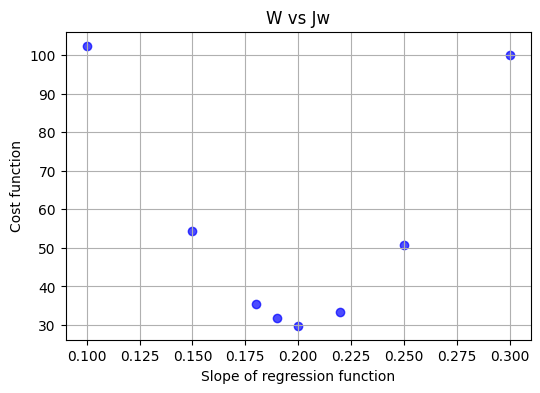

In [ ]:
list_of_ws.append(w8)
list_of_jws.append(jw8)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

ASSUMPTION 9

In [ ]:
w9 = 0.21
consumption_pred9 = []
for income in incomes:
  consumption_pred9.append(income * w9 + 0)

print(consumption_pred9)

[210.0, 231.0, 225.75, 199.5, 193.2, 218.4, 224.7, 225.75, 231.0, 231.0, 220.5, 199.5, 210.0, 203.7, 193.2, 189.0, 205.79999999999998, 220.5, 226.79999999999998, 222.6, 231.0, 220.5, 199.5, 210.0, 203.7, 193.2, 199.5, 193.2, 218.4, 224.7]


In [ ]:
#counting the cost function for consumption_pred9
jw9 = 0.0
for i in range(30):
  x = abs(consumption[i] - consumption_pred9[i])
  jw9 += x
jw9 = jw9 / 30

print(jw9)

30.55999999999999


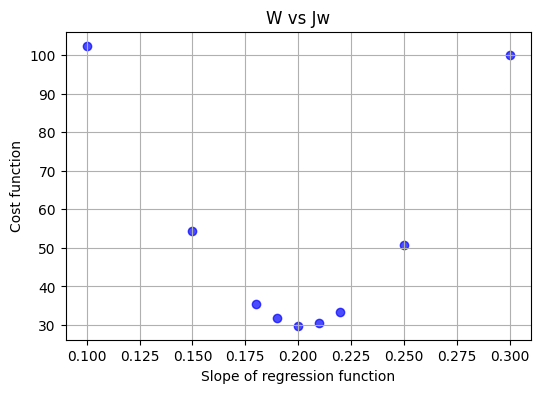

In [ ]:
list_of_ws.append(w9)
list_of_jws.append(jw9)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.scatter(list_of_ws, list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [ ]:
#assumptions are repititive, thus why not put them in a loop?!

#forming the consumption prediction list


#counting the difference between conumption pred and actual consumption values
#counting the cost function for consumption_pred9


#visualizing the chart



#creating list of ws, 0.125, 0.165, 0.205, 0.235, 0.275
#we will need to create a dictionary of y predictions and costs
#ws_list = [0.125, 0.165, 0.205, 0.235, 0.275]
#trial_dict = {}
#consumption_pred10 = []
#consumption_pred11 = []
#consumption_pred12 = []
#consumption_pred13 = []
#consumption_pred14 = []
#list_of_consumption_predictions = [consumption_pred10, consumption_pred11, consumption_pred12, consumption_pred13, consumption_pred14]
#jw10 = 0.0
#jw11 = 0.0
#jw12 = 0.0
#jw13 = 0.0
#jw14 = 0.0
#list_of_extra_jws = [jw10, jw11, jw12, jw13, jw14]

#for w in ws_list:
  #increasing_x = 0
  #for income in incomes:
    #list_of_consumption_predictions[increasing_x].append(income * w + 0)

  # for i in range(30):
  #   x = abs(consumption[i] - list_of_consumption_predictions[increasing_x][i])
  #   list_of_extra_jws[increasing_x] =(list_of_extra_jws[increasing_x] + x) / 30
  # increasing_x += 1


NOW, and instead of assuming indefinitely,  we will try to get the slope of the cost function at 0

drawing the function with a line

In [ ]:
# these are 2 lists mapping to each other with a specific order, and we need to put them in order, so we can visualize the line plot(parabola)
# so we will zip the 2 lists in a dictionary, then order the dictionary by its keys, then unzip the dictionary back into 2 new lists
my_dict = {key: value for key, value in zip(list_of_ws, list_of_jws)}
ordered_dict = dict(sorted(my_dict.items()))
keys, values = zip(*ordered_dict.items())
ordered_list_of_ws = list(keys)
ordered_list_of_jws = list(values)


In [ ]:
#creating function to oreder lists ascendingly, not needed anymore, but i cherish it

def sabohano_selection_sort(array):
  for current in range(len(array)-1):
    minindex = current
    for i in range(current + 1, len(array)):
      if array[i] < array[minindex]:
        minindex = i
    array[current], array[minindex] = array[minindex], array[current]
  return array




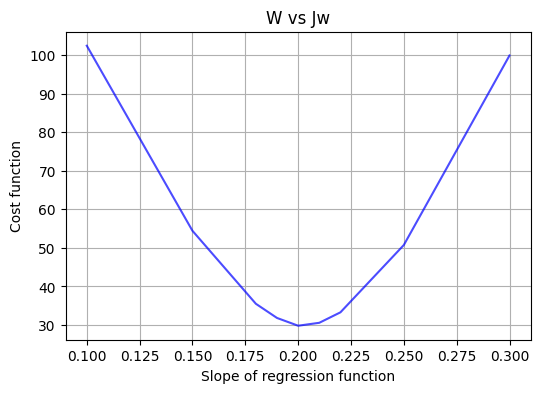

In [ ]:
list_of_ws.append(w9)
list_of_jws.append(jw9)
plt.figure(figsize=(6, 4))  # Set figure size for better visualization
plt.plot(ordered_list_of_ws, ordered_list_of_jws, color='blue', alpha=0.7)
plt.xlabel("Slope of regression function")
plt.ylabel("Cost function")
plt.title("W vs Jw")
plt.grid(True)  # Add grid lines for better readability
plt.show()

NOW, IT'S TIME FOR GRADIEN DESCENT

In [ ]:
#Linear regression model
#fw,b(x) = wx + b

#gradient descent algorithm
#repeat unitl convergence {
    #w=w- alpha (delta/delta w) j(w,b)
    #b = b - alpha (delta/delta b) j(w,b)
#}

#cost function
# j(w, b) = 1/m sum(y-y')
# w = w- alpha 1/m sum(y-y')
# b = b - alpha 1/m sum(y-y')

#gradient descent needs to know which direction it will go on the parabola, right or left
# w(new) = w(old) - alpha (d j(w)/d(w))

#we calculate the y - y' in three examples:
# where w is 0.1, 0.2, 0.3
# where incomes are (1000, 1100, 1075)
# where consumptions are(200, 250, 230)
# b = 0
#f(x) =  0.1 * income
#consumption = 0.1 * income
#cost function = (y1 - y1`) + (y2 - y2`) + (y3 - y3`)
#cost_function = (200 - (0.1*1000)) + (250 - (0.1*1100)) + (230 -(0.1 * 1075))
#print(cost_function)

In [ ]:
#we will start with the intercept B
#we need to find the least square estimate for the slope
incomes_mean = sum(incomes) / len(incomes)
consumption_mean = sum(consumption) / len(consumption)

#calculating xi - x`

sum_of_x = 0
for income in incomes:
  #x == income - incomes_mean
  #sum_of_x += x
  x = income - incomes_mean
  sum_of_x += x
print(sum_of_x)

sum_of_y = 0
for cons in consumption:
  #x == income - incomes_mean
  #sum_of_x += x
  y = cons - consumption_mean
  sum_of_y += y
print(sum_of_y)






0.0
2.8421709430404007e-13


USING LINEAR REGRESSION ALGORITHM, AND COMPARING IS WITH BY HAND VALUES

Model 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import normalize

In [ ]:
x = np.array(incomes)
y = np.array(consumption)


Splitting the dataset into 2 parts for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Regressor1= LinearRegression()

In [ ]:
Regressor1.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
Regressor1.get_params(0)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
Regressor1.coef_

array([0.50762611])

In [ ]:
Regressor1.intercept_

-312.50992110925165

Testing

In [ ]:
y_pred = Regressor1.predict(x_test.reshape(-1,1))
y_pred

array([154.5060961 , 144.35357399, 195.11618456, 220.49748984,
       245.87879512, 245.87879512])

In [ ]:
y_test

array([230, 150, 200, 200, 250, 250])

Evaluation

In [ ]:
Regressor1.score(x_train.reshape(-1,1), y_train)

0.4633708506451456

In [ ]:
Regressor1.score(x_test.reshape(-1,1), y_test)

0.15329376528878547

In [ ]:
mse=mean_squared_error(y_pred, y_test)
mse

1034.863175758151

In [ ]:
rmse=np.sqrt(mse)
rmse

32.16928932628371

In [ ]:
mae=mean_absolute_error(y_pred, y_test)
mae

19.12734082397003

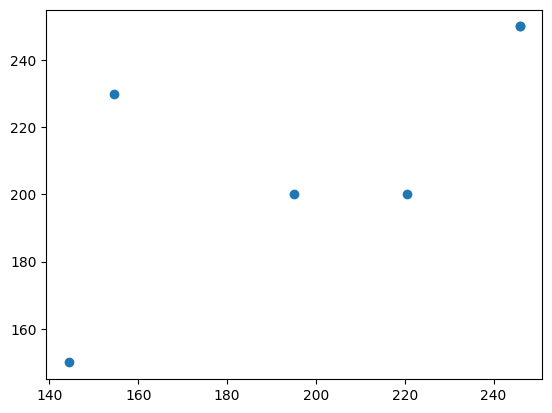

In [ ]:
plt.scatter(y_pred, y_test)